## C-1: Titanic - PyCaret ##
Bu uygulamada klasik Titanic yarışmasında Pycaret kullanılarak otomatik modelleme yapılacaktır.

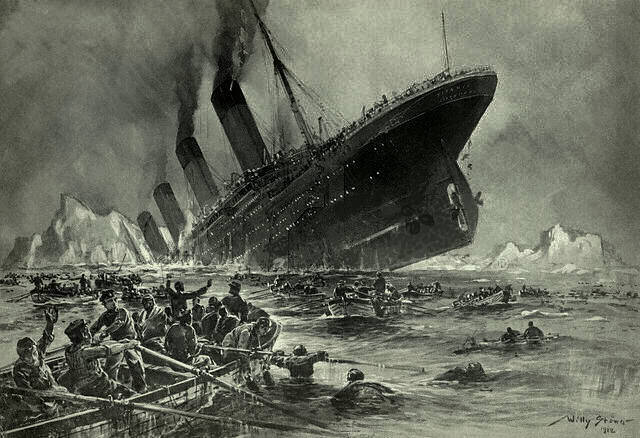

### Pycaret kütüphaneinin kurulması ###

In [ ]:
!pip3 install pycaret

In [ ]:
import pycaret
pycaret.__version__

## Kütüphaneleri içe aktar ##

In [ ]:
import pandas as pd
from pycaret import classification
#from pycaret import regression

In [ ]:
#regresyon modelleri için
#from pycaret import regression

## Veri Setlerini Yükle ##

In [ ]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [ ]:
train.head()

## Model Kur (Setup) ##

In [ ]:
clf1 = classification.setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             #categorical_features = ['Sex','Embarked'], 
             ignore_features = ['PassengerId','Name','Ticket','Cabin'],
             normalize = True,
             session_id = 42
             )

## Modelleri Karşılaştır: En iyi model ##

In [ ]:
classification.compare_models()

## En İyi Model Cross Validation ##

In [ ]:
classification_catboost	 = classification.create_model('catboost')

## En İyi Modeli İçin İnce Ayar (Fine Tuning) ##

In [ ]:
tuned_catboost_model = classification.tune_model(classification_catboost)

## En İyi Modelin Parametreleri ##

In [ ]:
print(tuned_catboost_model.get_all_params())

## Performans ROC Curve ## 

In [ ]:
classification.plot_model(tuned_catboost_model)

## Öğrenme Eğrisi ##

In [ ]:
classification.plot_model(estimator = tuned_catboost_model, plot = 'learning')

## Hata Matrisi ##

In [ ]:
#  plot confusion matrix
classification.plot_model(tuned_catboost_model, plot = 'confusion_matrix')

In [ ]:
classification.plot_model(tuned_catboost_model, plot = 'error')

## Özelliklerin Önemleri ##

In [ ]:
classification.plot_model(tuned_catboost_model, plot='feature')

## Modelin Değerlendirilmesi ##

In [ ]:
classification.evaluate_model(tuned_catboost_model)

## Pycaret ile Çoklu Model Uygulama ##

In [ ]:
# Modelleri tanımla
gbc  = classification.create_model('gbc');
lgbm = classification.create_model('lightgbm');
rf=classification.create_model('rf')

#Modelleri karıştır
blend = classification.blend_models(estimator_list=[tuned_catboost_model,gbc,lgbm,rf])

## En İyi Blender Modeli İçin İnce Ayar (Fine Tuning) ##

In [ ]:
#Blend daha iyi çıkmadığı için kullanılmadı
#tuned_blend = classification.tune_model(blend)

## Tahminleri Yap ##

In [ ]:
predictions = classification.predict_model(tuned_catboost_model, data=test)
predictions.head(20)

## Modeli Kaydet ##

In [ ]:
classification.save_model(tuned_catboost_model, 'titanic_model')

## Submission Dosyası Oluştur ##

In [ ]:
sub['Survived'] = round(predictions['prediction_label']).astype(int)
sub.to_csv('submission.csv',index=False)
sub.head(10)

## Değerlendirme ##

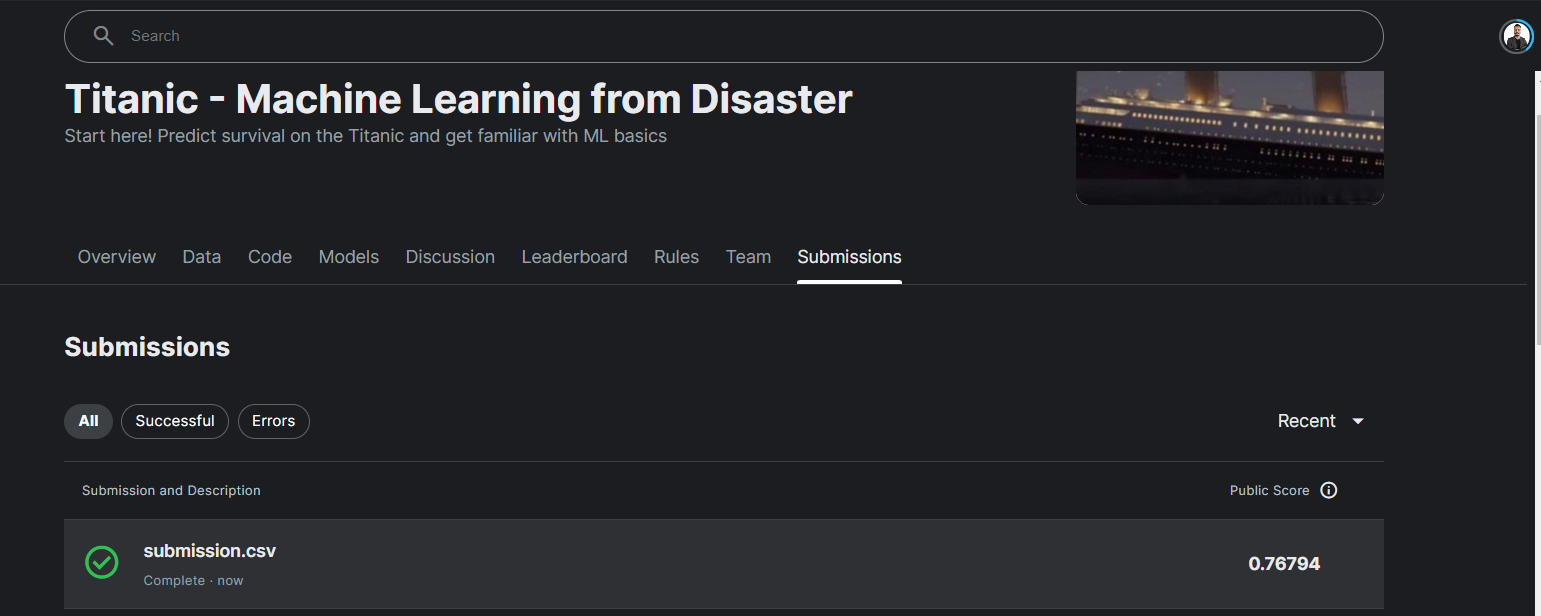